In [1]:
import json
import random

import matplotlib.pyplot as plt

def randomize_colors(length):
    """ Create an array of random colors of given length """

    return ['#' + ''.join(map(lambda x: random.choice('0123456789abcde'), range(6))) for i in range(length)]

def plot_emails_years(filename='global_stats_year.json'):
    """ Plot emails over years as a bar chart """

    data = json.load(open(filename))
    years = list(data.keys())
    emails = list(data.values())

    plt.bar(years, emails, align='center', alpha=0.8, edgecolor='000',
            color=randomize_colors(len(years)))
    plt.xticks(np.arange(len(years)), rotation='45')
    plt.ylabel('Email')
    plt.xlabel('Year')
    plt.grid(True)
    plt.title('Year-wise Emails')

    plt.show()

<Figure size 640x480 with 0 Axes>

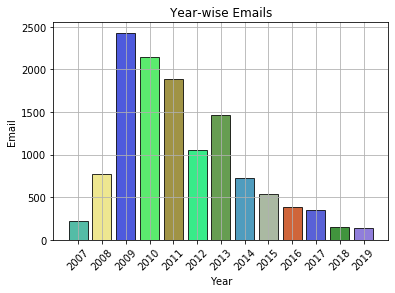

In [2]:
plot_emails_years()

In [3]:
import json
import matplotlib.pyplot as plt
import collections

def plot_top_posters_pie(filename='global_stats_sender.json', count=10, show_all=False):
    """ Plot top posters as a pie chart """

    data = json.load(open(filename))
    counter = collections.Counter(data)
    total_emails = sum(counter.values())
    print("Total emails =>",total_emails)
    top = dict(counter.most_common(count))
    
    labels = list(top.keys())
    nums = list(top.values())
    
    total_nums = sum(nums)
    total_rest = total_emails - total_nums
    print('Total at top =>',total_nums)
    
    if show_all:
        nums.append(total_rest)
        labels.append('Rest')
    
    #figureObject, axesObject = plt.subplots()
    plt.pie(nums, labels=labels,autopct='%1.2f',startangle=90, labeldistance=1.02,
            shadow=True, counterclock=True, colors=randomize_colors(len(nums)))
    # axesObject.axis('equal')

    plt.show()

Total emails => 12246
Total at top => 3618


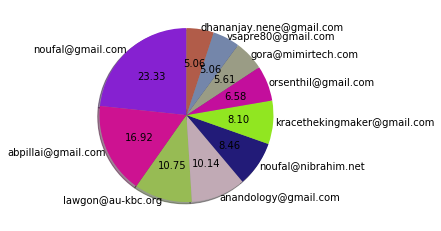

In [4]:
plot_top_posters_pie()

Total emails => 12246
Total at top => 3618


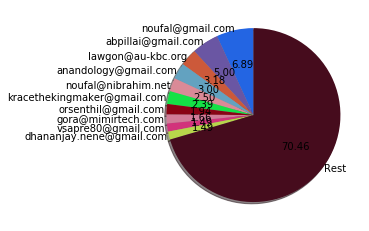

In [5]:
plot_top_posters_pie(show_all=True)

In [6]:
from matplotlib.ticker import PercentFormatter

def plot_post_frequency(filename='global_stats_sender.json'):
    """ Plot most common frequencies of posting """

    data = json.load(open(filename))
    counts = []
    
    for v in data.values():
        counts.append(v)
        
    plt.hist(counts, bins=500, density=True, facecolor='g')
    plt.xlabel('Count')
    plt.xlim(-10, 100)
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylabel('Percentage')
    plt.show()

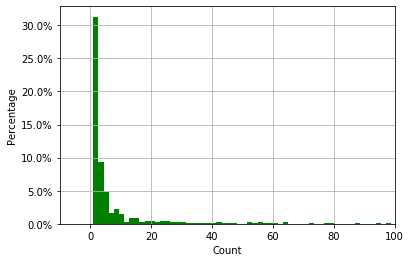

In [7]:
plot_post_frequency()

In [8]:
def plot_emails_threads(filename='global_thread_stats.json', cutoff=10):
    """ Plot year vs # threads with emai count >= cutoff in the entire year """
    
    data = json.load(open(filename))

    years = []
    values = []

    for year in range(2007, 2020):
        year_total = 0
        years.append(str(year))
        
        for key in data.keys():
            if key.startswith(str(year)):
                val = data[key]
                if val >= cutoff:
                    year_total += 1
                
        values.append(year_total)

    print(dict(zip(years,values)))
    plt.bar(years, values, align='center', alpha=0.8, edgecolor='000',
            color=randomize_colors(len(years)))
    plt.xticks(np.arange(len(years)), rotation='45')
    plt.ylabel('Large Threads (>={})'.format(cutoff))
    plt.xlabel('Year')
    plt.grid(True)
    plt.title('Year-wise top threads')

    plt.show()

{'2007': 4, '2008': 12, '2009': 56, '2010': 49, '2011': 45, '2012': 21, '2013': 33, '2014': 9, '2015': 8, '2016': 1, '2017': 3, '2018': 0, '2019': 0}


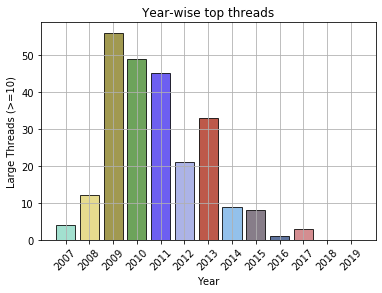

In [9]:
plot_emails_threads()

In [48]:
import networkx as nx

def plot_thread_network(filename='global_thread_graph.json', year=2009, month=None, save=False):
    """ Plot email threads and participants as a network graph """

    data = json.load(open(filename))

    G = nx.Graph()
    nodes = {}
    edges = []
    count = 0
    
    # A dense core with lots of edges indicate a very active year
    for key in data.keys():
        if key.startswith(str(year) + '/'):
            if month != None and key.find('/' + month + '/') == -1: continue 
            # Each participant is a node.
            participants = data[key]
            if len(participants) == 0: continue

            for person in participants:
                if person not in nodes:
                    # Add a node
                    G.add_node(person)
                    nodes[person] = 1
                    count += 1

            # Each thread defines edges.
            # First sender is the thread creator
            # Add edge from him/her to all else
            # in the thread
            sender = participants[0]
            for person in participants[1:]:
                # Dont add edge to same node
                if person != sender:
                    edge = (sender, person)
                    G.add_edge(*edge)
    
    options = {'node_size': 10,
               'width': 1}
    
    plt.clf()
    # print(count)
    nx.draw(G, with_labels=False, font_weight='normal', node_color=range(count), cmap=plt.cm.Reds, **options)
    plt.text(-0.05, 0.75, str(year), size=20)
    if save: plt.savefig("network{}.png".format(year % 2005))

In [26]:
%matplotlib
plot_thread_network(year=2009, save=True)

Using matplotlib backend: TkAgg


In [28]:
%matplotlib inline
plot_thread_network(year=2019)

Using matplotlib backend: TkAgg


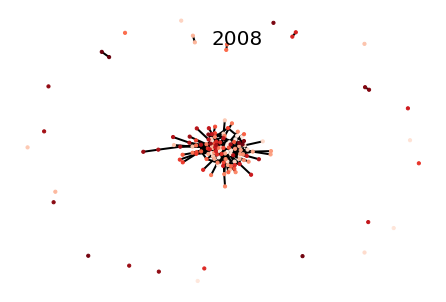

In [19]:
%matplotlib inline
plot_thread_network(year=2008)

In [49]:
for i in range(2007, 2020):
    plot_thread_network(year=i, save=True)